In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mnist_utils as mu
import random
import pyNN.nest as p
import relu_utils as alg
import spiking_relu as sr
import cnn_utils as cnnu

In [2]:
import scipy.io as sio
tmp_x = sio.loadmat('mnist.mat')['test_x']
tmp_x = np.transpose(tmp_x, (2, 0, 1))
tmp_x = np.reshape(tmp_x, (tmp_x.shape[0], 28*28), order='F' )

tmp_y = sio.loadmat('mnist.mat')['test_y']
tmp_y = np.argmax(tmp_y, axis=0)

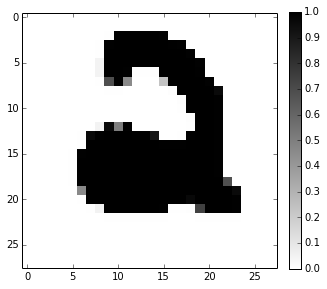

In [3]:
num_train = 100
tx = tmp_x[0:num_train]
mu.plot_digit(tx[0])
ty = tmp_y[0:num_train]

SUM_rate = 2000.
for i in range(num_train):
    tx[i] = tx[i]/sum(tx[i])*SUM_rate

In [4]:
w, l = cnnu.readmat('cnn684.mat')
r = cnnu.test(w, l, tx)

#print np.argmax(r[-1][0],axis=1), ty

In [5]:
w_new, a = cnnu.scale_weight(w, l, tx)

22.2309203688
8.65982841539


In [5]:
w_new, a = cnnu.scale_weight(w, l, tx)

21.1954667957
1


/home/liuq/env/nest_pynn0.7/lib/python2.7/site-packages/numpy/core/_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/liuq/env/nest_pynn0.7/lib/python2.7/site-packages/numpy/core/_methods.py:67: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
result_snn = np.argmax(a, axis=1)
result_cnn = np.argmax(r[-1][0], axis=1)
label = ty[:num_train]
print (result_snn == label).astype(int).sum(), (result_cnn == label).astype(int).sum()

87 90


In [5]:
def predict_rate(output, scale):
    
    k = 167.6
    x0 = 0.1
    y0 = 4.48
    #x0 = 0.
    #y0 = 0.
    
    output *= scale/1000.
    out_log = 14.*np.log(1.+np.exp(output*10.))
    out_relu = sr.transf(k, x0, y0, output)
    #out_rate = sr.transf(k, x0, y0, output)
    return out_log, out_relu

14.8368730842 9.88455253444


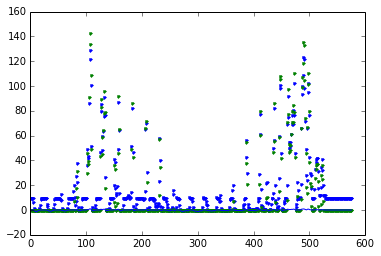

In [6]:
curr = cnnu.(r[0][0][0:1], w[0][0][1])
frate_log, frate_relu = predict_rate(curr, 22.)
plt.plot(frate_log[0],'b.')
plt.plot(frate_relu[0], 'g.')
plt.plot(curr[0])
print np.mean(frate_log[0]), np.mean(frate_relu[0])

In [ ]:
def test_ReLU_orig(W, L, tx):
    a = list()
    a.append(tx)
    a = np.array(a)
    a_list = list()
    for l in range(len(L)-1):
        input_num = a.shape[0]
        output_num = L[l+1][0]        
        a_list.append(a)
        if output_num == 0: #pooling layer S
            a = pool_ReLU(input_num, a_list[l], W[l])
        elif output_num > 0: #conv layer C
            a = conv_ReLU(input_num, output_num, a_list[l], W[l])
        elif output_num == -1: #output layer O
            a = out_ReLU(a_list[l], W[l])
        a = np.array(a)
    a_list.append(a)
    
    return a_list
def conv_ReLU(input_num, output_num, input_list, w_list):
    out_list=[]
    for j in range(output_num):
        for i in range(input_num):
            if i==0:
                out_a = conv2d(input_list[i], w_list[i][j])
            else:
                out_a += conv2d(input_list[i], w_list[i][j])
        out_a[out_a<0] = 0
        out_list.append(out_a)
    return out_list

def pool_ReLU(input_num, input_list, w_list):
    out_list=[]
    for i in range(input_num):
        out_a = conv2d(input_list[i], w_list, mode='s')
        out_a[out_a<0] = 0
        out_list.append(out_a)
    return out_list

def out_ReLU(input_list, w_list):
    out_list=[]
    input_a = np.transpose(input_list, (1, 0, 2))
    input_a = np.reshape(input_a, (input_a.shape[0], input_a.shape[1]*input_a.shape[2]))
    out_a = np.dot(input_a, np.transpose(w_list))
    out_a[out_a<0] = 0
    out_list.append(out_a)
    return out_list

In [15]:
out_a = np.array([])
x = cnnu.conv2d(r[0][0], w[0][0][1])
print x.shape, r[0][0].shape, w[0][0][1].shape
np.append(out_a, x).shape

(100, 576) (100, 784) (5, 5)


(57600,)

../train-images.idx3-ubyte
100


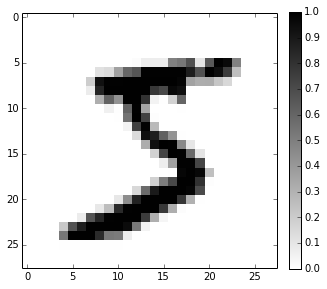

In [22]:
w, l = readmat('cnnet.mat')
SUM_rate = 2000.
import scipy.io as sio
'''
test0 = sio.loadmat('test0.mat')['test0']
test0 = np.reshape(test0, (1, 28*28), order='F' )
for i in range(test0.shape[0]):
    test0[i] = test0[i]/sum(test0[i])*SUM_rate
'''
train_x,train_y = mu.get_train_data()
#num_train = train_x.shape[0]
num_train = 100
print num_train
ind = np.where(train_y>=0)[0][:num_train]
tx = train_x[ind]
for i in range(num_train):
    tx[i] = tx[i]/sum(tx[i])*SUM_rate
mu.plot_digit(tx[0])